<img align="right" src="https://prnewswire2-a.akamaihd.net/p/1893751/sp/189375100/thumbnail/entry_id/1_p33qkid5/def_height/46/def_width/200/version/100011/type/1">

### Solution By: Suraj K. Ekka
Last updated Oct 30, 2020

### Project - Concrete Strength Prediction

To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain a score above 85%.

### Datasets Information:

<img align = "center" src="files/Data.JPG">

___

### Domain: 
***Construction***


#### GitHub Link 
`Link`

In [1]:
#Packages for data processing
import pandas as pd
import numpy as np

#Packages for Ploting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

#To warnings turn off
import warnings
warnings.filterwarnings('ignore')

#modeling package
from sklearn.model_selection import train_test_split
from scipy import stats
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score, f1_score, classification_report


import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
import os


#########
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [2]:
df = pd.read_csv('concrete.csv')
df.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


In [3]:
df.shape

(1030, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


#### Skewness defination:
- skewness = 0 : normally distributed.
- skewness > 0 : more weight in the left tail of the distribution.
- skewness < 0 : more weight in the right tail of the distribution.

In [6]:
df.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

In [7]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [8]:
df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [9]:
df.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

### Bivariate Analysis

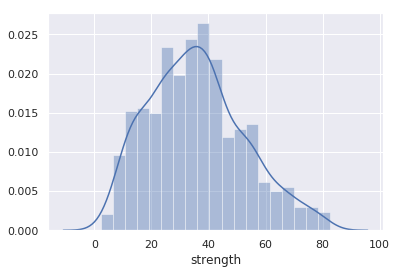

In [10]:
sns.distplot(df['strength'])
plt.show()

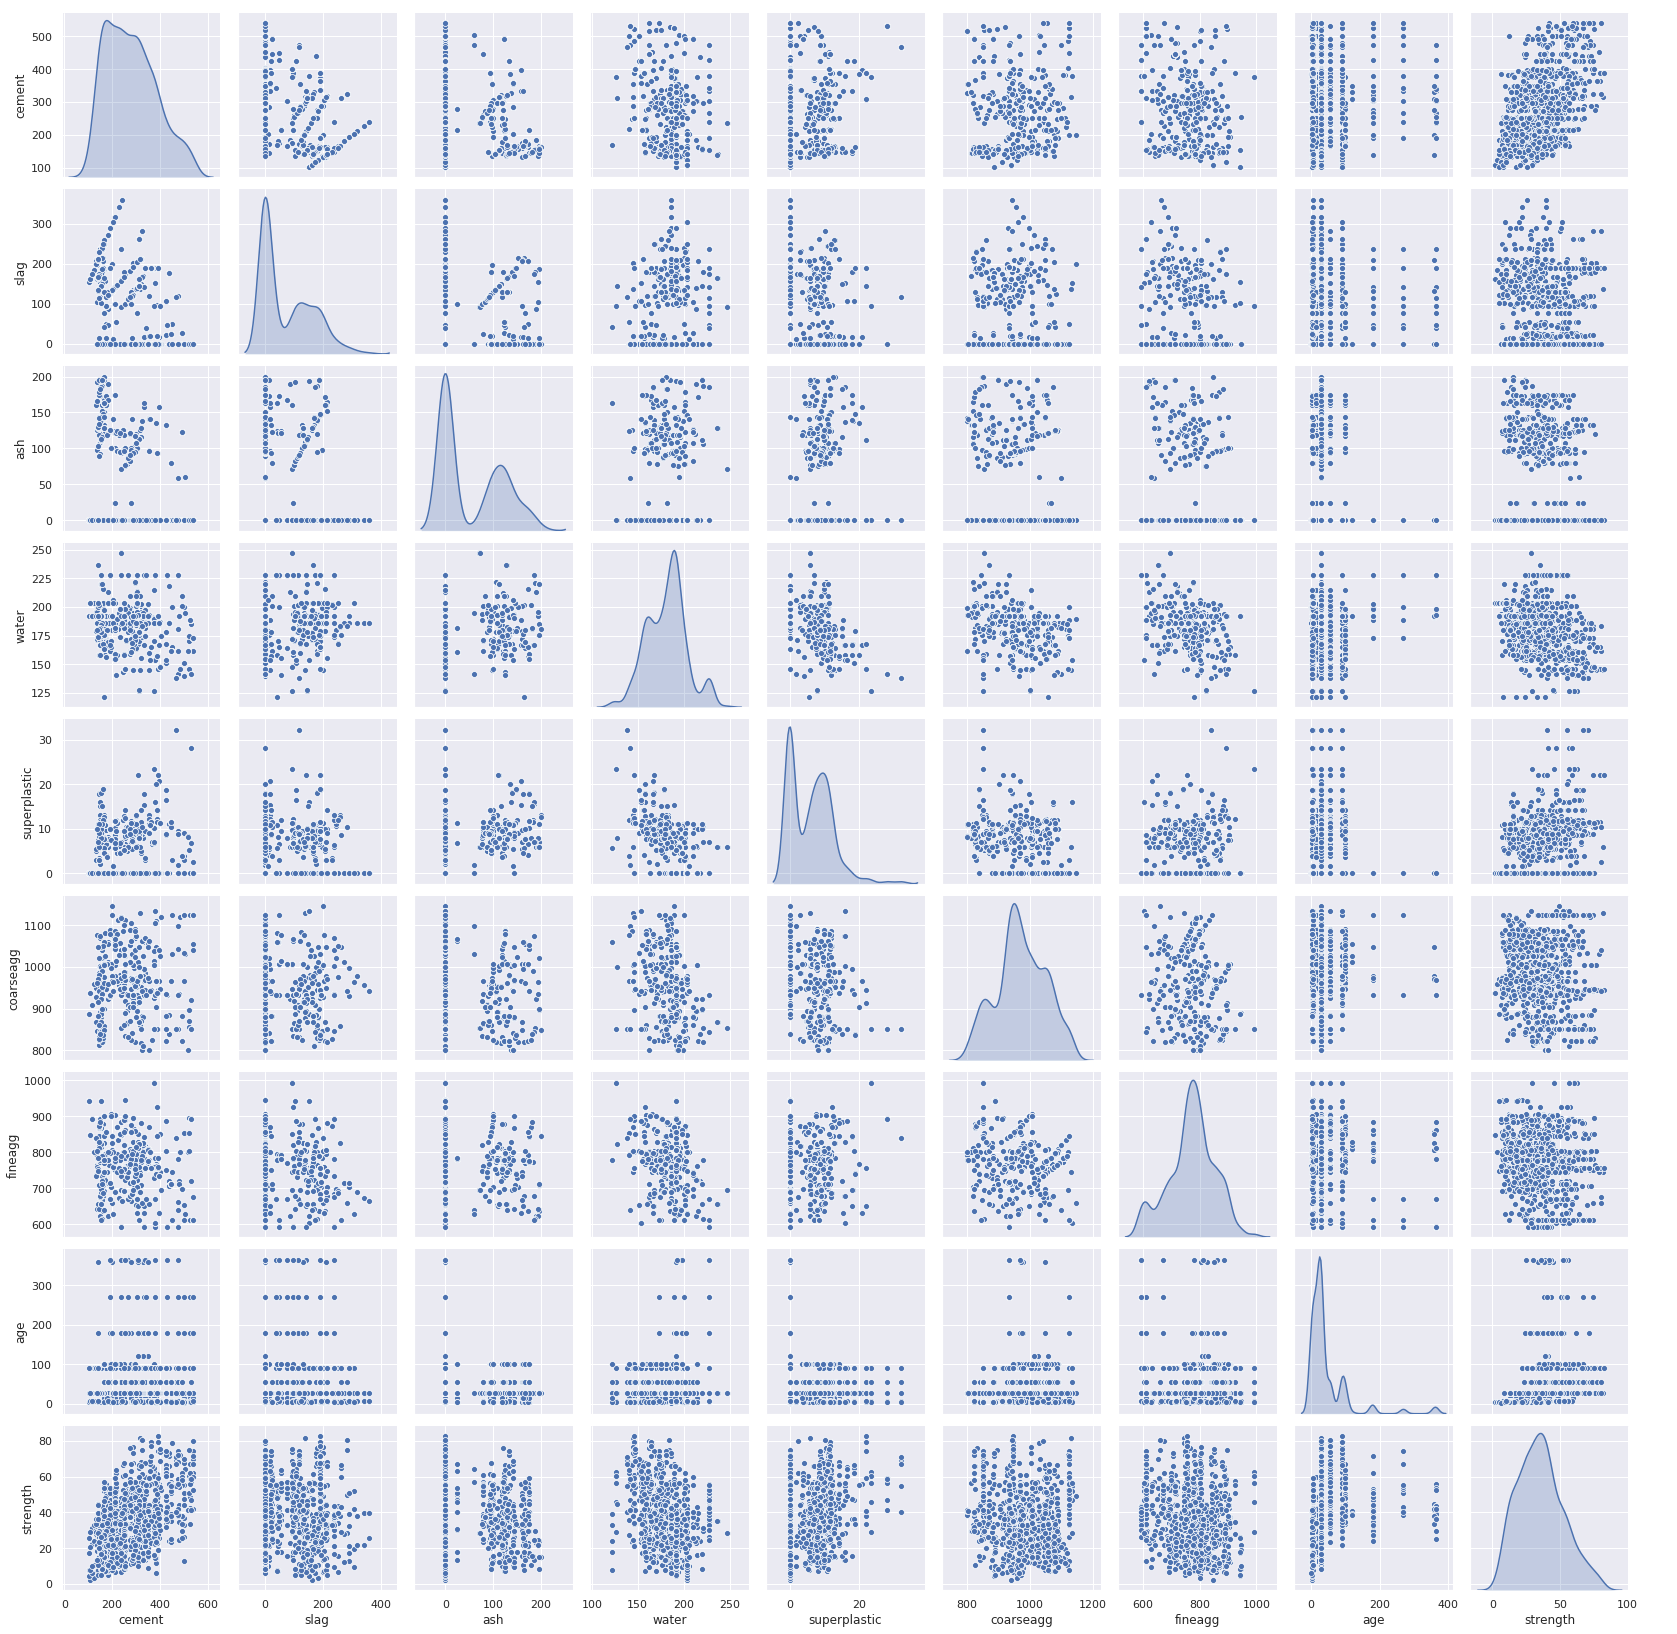

In [11]:
sns.pairplot(df, diag_kind='kde')
plt.show()

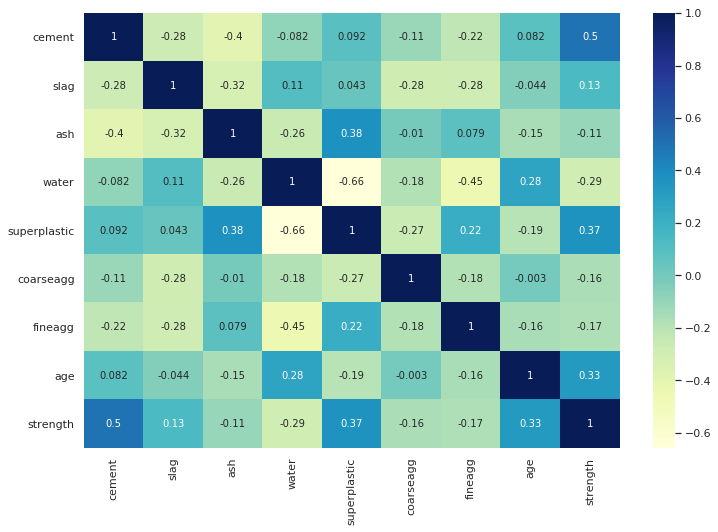

In [12]:
plt.figure(figsize=(12,8))
corr_DF = df.corr()
sns.heatmap(corr_DF, annot = True, cmap="YlGnBu")
plt.show()

In [13]:
def label(data):
    if data["age"] <= 30:
        return "1"
    if data["age"] > 30 and data["age"] <= 60 :
        return "2"
    if data["age"] > 60 and data["age"] <= 90 :
        return "3"
    if data["age"] > 90 and data["age"] <= 120 :
        return "4"
    if data["age"] > 120 and data["age"] <= 150 :
        return "5"
    if data["age"] > 150 and data["age"] <= 180 :
        return "6"
    if data["age"] > 180 and data["age"] <= 210 :
        return "7"
    if data["age"] > 210 and data["age"] <= 240 :
        return "8"
    if data["age"] > 240 and data["age"] <= 270 :
        return "9"
    if data["age"] > 270 and data["age"] <= 300 :
        return "10"
    if data["age"] > 300 and data["age"] <= 330 :
        return "11"
    if data["age"] > 330 :
        return "12"
df["age_months"] = df.apply(lambda df:label(df) , axis=1)

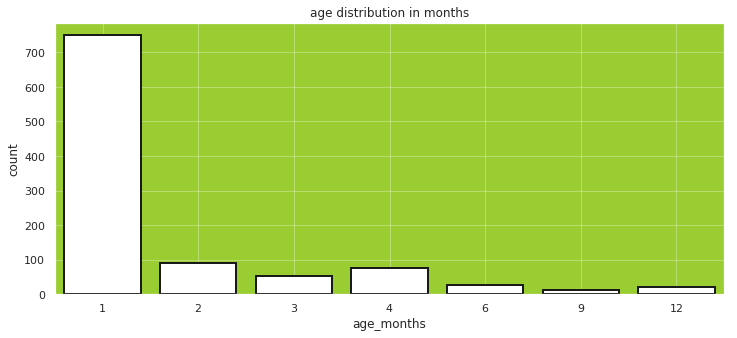

In [14]:
plt.figure(figsize=(12,5))
# order = ['1','2', '3','4','5','6','7','8','9','10','11', '12']
order = ['1','2', '3','4','6','9','12']
ax = sns.countplot(df["age_months"],
                   order=order,linewidth=2,
                   edgecolor = "k"*len(order),
                   palette=["w"])
ax.set_facecolor("yellowgreen")
plt.title("age distribution in months")
plt.grid(True,alpha=.3)
plt.show()

In [15]:
df.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,age_months
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29,1
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30,1
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,1
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06,9
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61,1


In [ ]:
# df2 = df.copy(deep=True)
# def lab(data2):
#     if data2["strength"] <= 17:
#         return "1"
#     if data2["strength"] >17 and data2["strength"] <= 28 :
#         return "2"
#     if data2["strength"] >28 :
#         return "3 "
    
# df2["strength_category"] = df2.apply(lambda df2:lab(df2) ,axis =1)

In [ ]:
df2.info()

In [16]:
df['age_months'] = df['age_months'].astype('int')
# df2['strength_category'] = df2['strength_category'].astype('int')

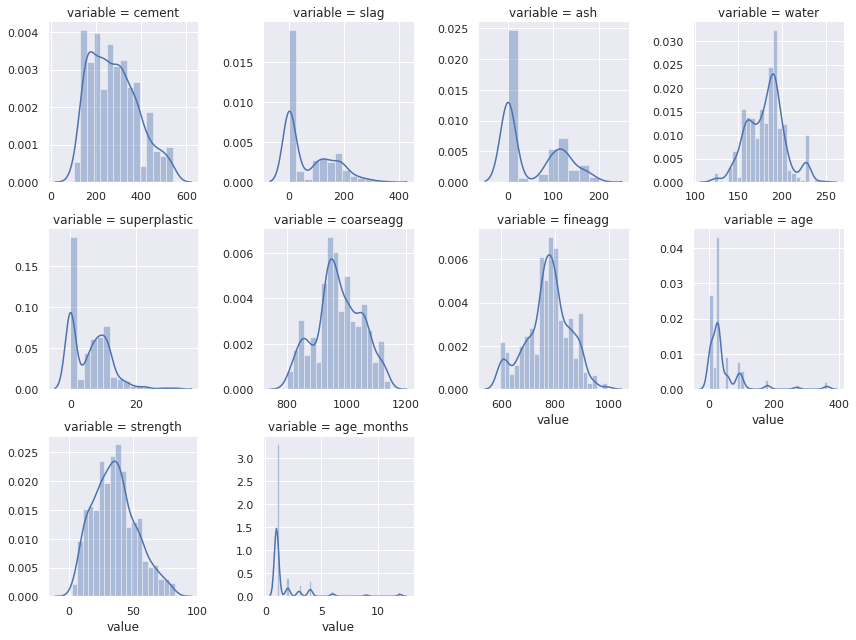

In [18]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
plt.show()

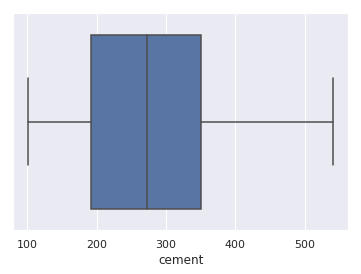

In [19]:
sns.boxplot(df['cement'])
plt.show()

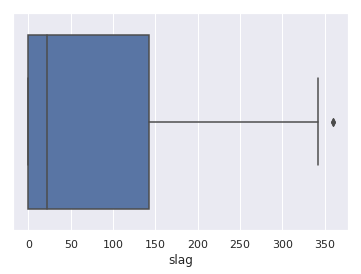

In [20]:
sns.boxplot(df['slag'])
plt.show()

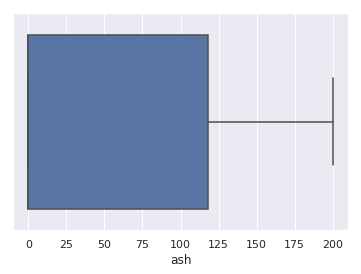

In [21]:
sns.boxplot(df['ash'])
plt.show()

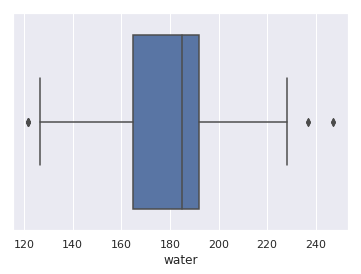

In [22]:
sns.boxplot(df['water'])
plt.show()

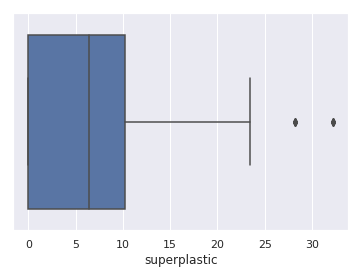

In [23]:
sns.boxplot(df['superplastic'])
plt.show()

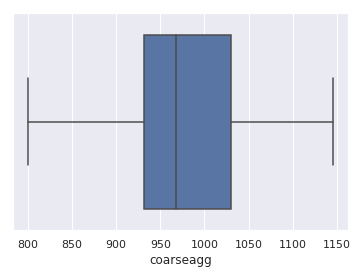

In [24]:
sns.boxplot(df['coarseagg'])
plt.show()

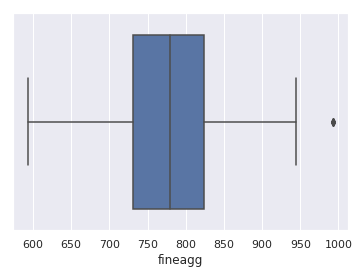

In [25]:
sns.boxplot(df['fineagg'])
plt.show()

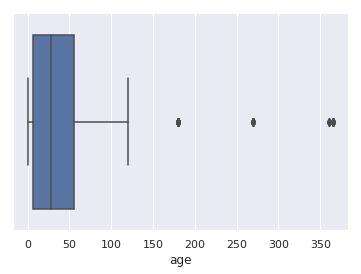

In [26]:
sns.boxplot(df['age'])
plt.show()

In [27]:
X = df.iloc[:,df.columns !='strength']
y = np.array(df['strength'])
Low_Quantile = X.quantile(0.05)
High_Quantile = X.quantile(0.95)

In [28]:
LowOutliers_data = (X< Low_Quantile)
HighOutliers_data = (X > High_Quantile)
X.mask(LowOutliers_data, Low_Quantile, axis=1, inplace = True)  
X.mask(HighOutliers_data,High_Quantile,axis =1, inplace = True)

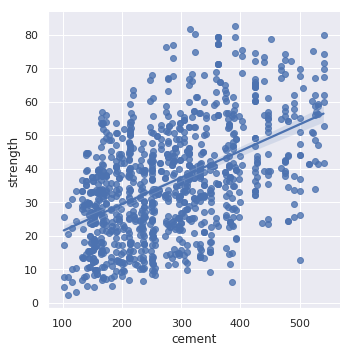

In [30]:
sns.lmplot(x='cement',y='strength',data= df)
plt.show()

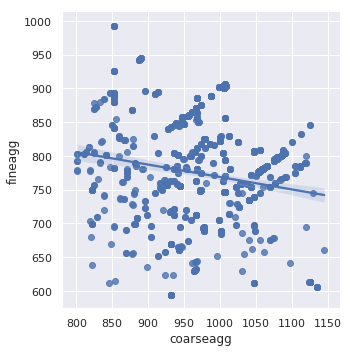

In [31]:
sns.lmplot(x='coarseagg',y='fineagg',data = df)
plt.show()

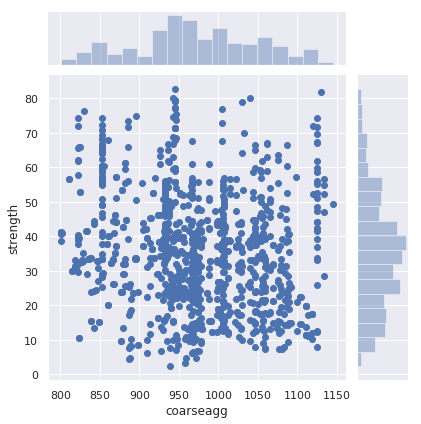

In [32]:
sns.jointplot(df['coarseagg'],df['strength'])
plt.show()

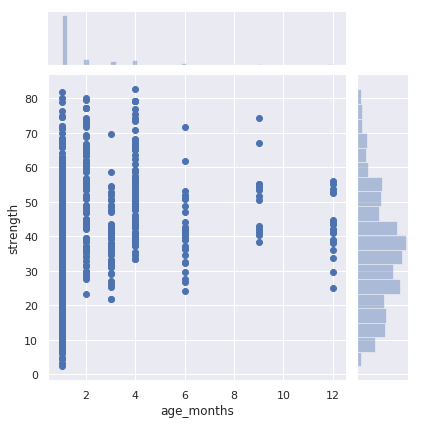

In [33]:
sns.jointplot(df['age_months'],df['strength'])
plt.show()

#### Model 1 - Linear Regression

In [34]:
df.drop(['age'],axis=1,inplace = True)
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(X)
df_normalized = pd.DataFrame(df_normalized,columns = X.columns)

In [36]:
xtrain,xtest,ytrain,ytest = train_test_split(df_normalized,y,test_size = 0.3 , random_state=5)

In [37]:
lm = LinearRegression()
lm.fit(xtrain,ytrain)
y_predict_lm = lm.predict(xtest)

In [38]:
print(lm.score(xtrain,ytrain))
print(lm.score(xtest,ytest))

0.7713163524155594
0.7327210160958442


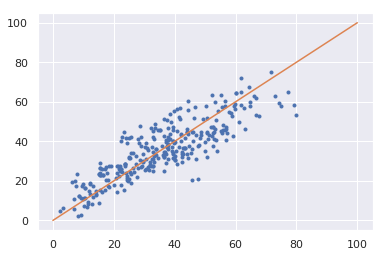

In [39]:
plt.plot(ytest, y_predict_lm, '.')
x = np.linspace(0, 100, 100)
y = x
plt.plot(x, y)
plt.show()

#### Adabooster

In [40]:
# from sklearn.ensemble import AdaBoostRegressor
abrg = AdaBoostRegressor( n_estimators= 20)
abrg= abrg.fit(xtrain,ytrain)

test_pred = abrg.predict(xtest)
abrg.score(xtest,ytest)

0.719131452648006

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
# Perform Grid-Search
gsc = GridSearchCV(
        estimator=RandomForestRegressor(random_state=7),
        param_grid={
            'max_depth': [4,5,3],
            'max_features': ['sqrt','log2',0.5],
            'min_samples_leaf': [1,3],
            'min_samples_split': [2,3],
            'n_estimators': [25,50,100]
        },
        cv=5)
    
grid_result = gsc.fit(xtrain,ytrain)
best_params = grid_result.best_params_
    
rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False,
                            verbose=False)
# Perform K-Fold CV
scores = cross_val_score(rfr, xtrain,ytrain, cv=10, scoring='neg_mean_absolute_error')
print(scores)

[-4.69675813 -5.01359821 -5.1254355  -5.19263811 -4.71355015 -5.24399395
 -5.78884127 -6.05378352 -5.81927792 -5.82122699]


In [42]:
print(grid_result,best_params)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=7,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [43]:
rfmodel = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False,
                            verbose=False)
rfmodel.fit(xtrain,ytrain)
rf_y_pred = rfmodel.predict(xtest)

In [44]:
rfmodel.score(xtrain,ytrain)
rfmodel.score(xtest,ytest)

0.8261610403236193

In [45]:
print("Training Score",rfmodel.score(xtrain,ytrain))
print("Testing Score",rfmodel.score(xtest,ytest))

Training Score 0.884976254936662
Testing Score 0.8261610403236193


In [46]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
clf = RandomForestRegressor()


rsv =   RandomizedSearchCV(
        estimator=RandomForestRegressor(random_state=7),
        param_distributions={"max_depth": [4, None],
              "max_features": randint(1, 9),
              "min_samples_split": randint(2, 20),
              "min_samples_leaf": randint(1, 20)
              }
        )
    
rsv_result = rsv.fit(xtrain,ytrain)
best_params = rsv_result.best_params_
    
rfm = RandomForestRegressor(max_depth=best_params["max_depth"],min_samples_leaf=best_params["min_samples_leaf"],min_samples_split=best_params["min_samples_split"],random_state=True,
                            verbose=False)
# Perform K-Fold CV
scores = cross_val_score(rfm, xtrain,ytrain, cv=10)
print(scores)

[0.90174598 0.8100753  0.86587113 0.84231898 0.86812589 0.88129758
 0.824723   0.83905664 0.8341992  0.83855022]


In [47]:
print(rsv_result,best_params)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                           

In [48]:
rfmmodel = RandomForestRegressor(max_depth=best_params["max_depth"],min_samples_leaf=best_params["min_samples_leaf"], min_samples_split=best_params["min_samples_split"],random_state=False,
                            verbose=False)
rfmmodel.fit(xtrain,ytrain)
rf_y_pred = rfmmodel.predict(xtest)

In [49]:
print("Training Score",rfmmodel.score(xtrain,ytrain))
print("Testing Score",rfmmodel.score(xtest,ytest))

Training Score 0.9182988879626967
Testing Score 0.8659575926356039
